# 動的シナプス

シナプス前活動に応じて**シナプス伝達効率** (synaptic efficacy)が動的に変化する性質を**短期的シナプス可塑性** (Short-term synaptic plasticity; STSP)といい，このような性質を持つシナプスを**動的シナプス** (dynamical synapses)と呼ぶ．シナプス伝達効率が減衰する現象を短期抑圧 (short-term depression; STD)，増強する現象を短期促通(short-term facilitation; STF)という．さらにそれぞれに対応するシナプスを減衰シナプス，増強シナプスという．ここでは{cite:p}`Mongillo2008-kk`および{cite:p}`Orhan2019-rq`で用いられている定式化を使用する．

$$
\begin{align}
\frac{\mathrm{d} x(t)}{\mathrm{d} t}=\frac{1-x(t)}{\tau_{x}}-u(t) x(t) r(t) \Delta t \\
\frac{\mathrm{d} u(t)}{\mathrm{d} t}=\frac{U-u(t)}{\tau_{u}}+U(1-u(t)) r(t) \Delta t
\end{align}
$$

ただし，$x$を利用可能な神経伝達物質の量, $u$を利用されている神経伝達物質の量(the neurotransmitter utilization), $\tau_x$は神経伝達物質の時定数 , $\tau_u$はutilization, $U$はincrement , $\Delta t$を時間幅とする．ここでは$\tau_x=$(200 ms/1,500 ms; facilitating/depressing),  $\tau_u=$(1,500 ms/200 ms; facilitating/depressing), $U=$(0.15/0.45; facilitating/depressing), $\Delta t=$10msとする．

In [1]:
using PyPlot
rc("axes.spines", top=false, right=false)

In [2]:
# ms
Uf, τfₓ, τfᵤ = 0.15, 200, 1500
Ud, τdₓ, τdᵤ = 0.45, 1500, 200
dt = 1
T = 4000
tarray = 1:dt:T;
nt = Int(T/dt);
s = zeros(nt) # stimuli
s[500:150:2000] .= 1;
s[2500:200:3000] .= 1;

In [3]:
# short-term synaptic plasticity
function stsp(dt, T, s, U, τₓ, τᵤ, τₛ=30)
    nt = Int(T/dt);
    αₓ, αᵤ, αₛ = dt/τₓ, dt/τᵤ, dt/τₛ # 時定数を減衰率に変換

    u, x, r = zeros(nt), zeros(nt), zeros(nt)
    u[1], x[1] = U, 1
    
    for t in 1:nt-1
        x[t+1] = x[t] + αₓ*(1-x[t]) - u[t]*x[t]*s[t]
        u[t+1] = u[t] + αᵤ*(U-u[t]) + U*(1-u[t])*s[t]
        x[t+1], u[t+1] = clamp.([x[t+1], u[t+1]], 0, 1) # for numerical stability
        r[t+1] = (1-αₛ)*r[t] + u[t]*x[t]*s[t]/U
    end
    return u, x, r
end;

In [4]:
# simulation
uf, xf, rf = stsp(dt, T, s, Uf, τfₓ, τfᵤ)
ud, xd, rd = stsp(dt, T, s, Ud, τdₓ, τdᵤ);

# compute synaptic efficacy
xuf = uf .* xf / Uf 
xud = ud .* xd / Ud; 

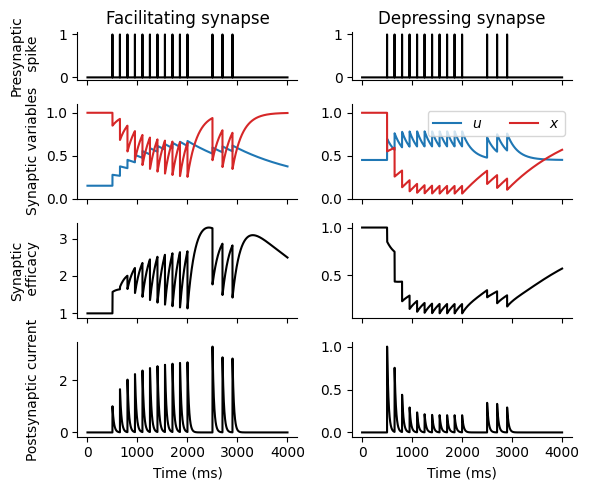

In [5]:
fig, axes = subplots(4, 2, figsize=(6, 5), sharex="col", height_ratios=[1, 2, 2, 2])
for i in 1:2
    axes[1,i].plot(tarray, s, "k");
    axes[2,i].set_ylim(0, 1.1); 
end
axes[1,1].set_title("Facilitating synapse"); axes[1,1].set_ylabel("Presynaptic\n spike");
axes[1,2].set_title("Depressing synapse"); 
axes[2,1].plot(tarray, uf); axes[2,1].plot(tarray, xf, "tab:red"); 
axes[2,1].set_ylabel("Synaptic variables"); 
axes[2,2].plot(tarray, ud, label=L"$u$"); axes[2,2].plot(tarray, xd, "tab:red", label=L"$x$"); axes[2,2].legend(ncol=2)
axes[3,1].plot(tarray, xuf, "k"); axes[3,1].set_ylabel("Synaptic\n efficacy")
axes[3,2].plot(tarray, xud, "k"); 
axes[4,1].plot(tarray, rf, "k"); axes[4,1].set_xlabel("Time (ms)"); axes[4,1].set_ylabel("Postsynaptic current")
axes[4,2].plot(tarray, rd, "k"); axes[4,2].set_xlabel("Time (ms)")
fig.align_labels()
fig.tight_layout()

## 参考文献
```{bibliography}
:filter: docname in docnames
```